This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [ ]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 4      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.tol_saddle = 0.08           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


In [13]:
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

INITIALISE SIMULATION PARAMETERS...Done!


In [14]:
### SELECT COMPUTATIONAL MESH

## RECTANGULAR MESHES
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'
#MESH = 'TRI03-ULTRAFINE-REC'

#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
#MESH = 'TRI06-SUPERFINE-REC'
#MESH = 'TRI06-MEGAFINE-REC'
MESH = 'TRI06-ULTRAFINE-REC'

## OVAL (VACUUM VESSEL) MESHES
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-SUPERFINE-ITER'
#MESH = 'TRI03-MEGAFINE-ITER'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-SUPERFINE-ITER'
#MESH = 'TRI06-MEGAFINE-ITER'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-ULTRAFINE-REC
READ MESH FILES...Done!


Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


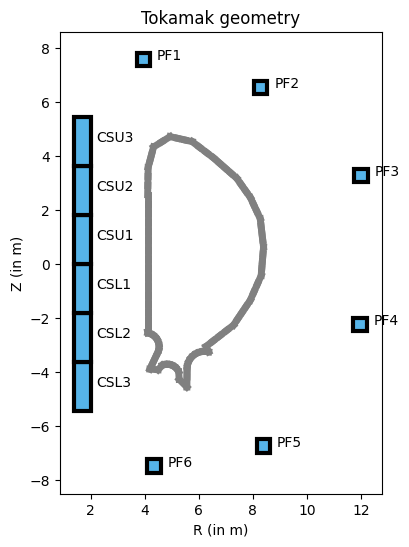

In [15]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.25)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.25)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.25)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.25)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.25)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.25)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.6
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))

magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

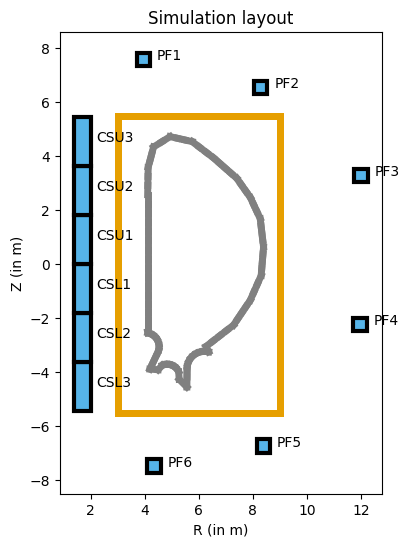

In [16]:
Equilibrium.PlotLayout(plotmesh=False)

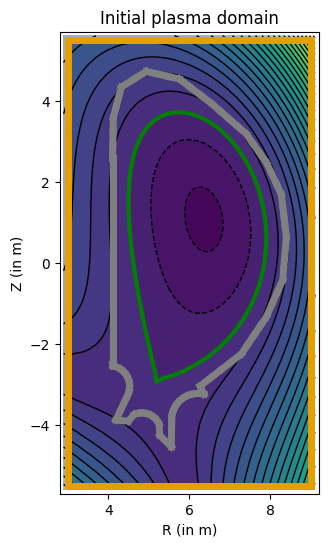

In [17]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [18]:
Equilibrium.InitialiseDomainDiscretisation()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.0028085106382970074 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.0804951213227549 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·49.69245258928821
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 17775, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


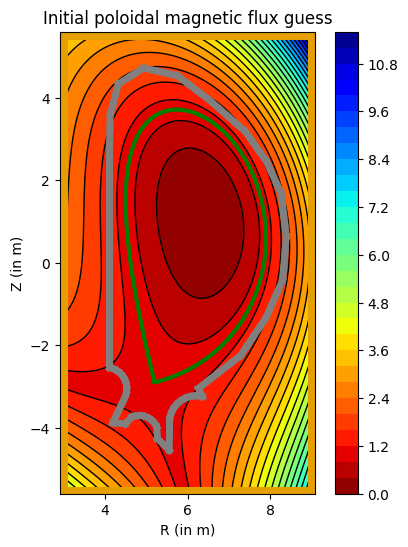

In [19]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [20]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


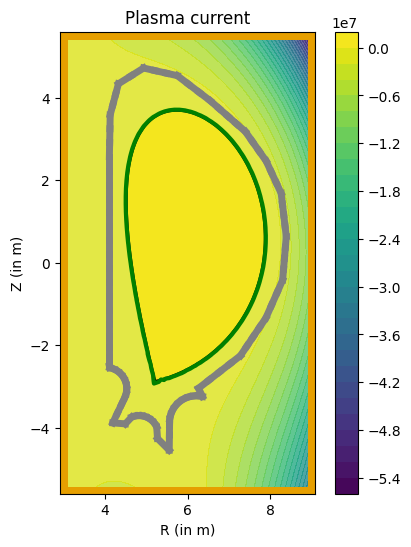

In [21]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL VACUUM VESSEL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


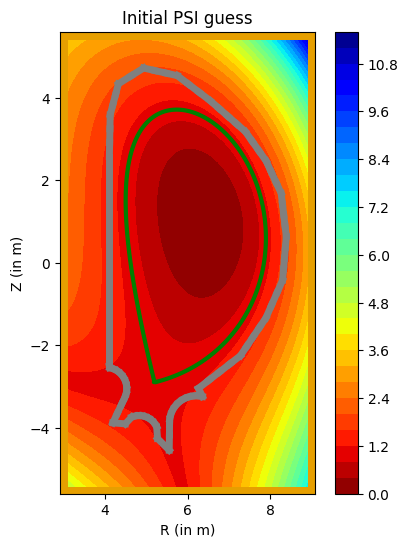

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  15000000.00000001
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.45357902 0.81497747]  (ELEMENT  6662 ) WITH VALUE PSI_0 =  -11.641730794239372
SADDLE POINT AT  [ 5.09229756 -3.30483331]  (ELEMENT  2994 ) WITH VALUE PSI_X =  -0.3833936962055093


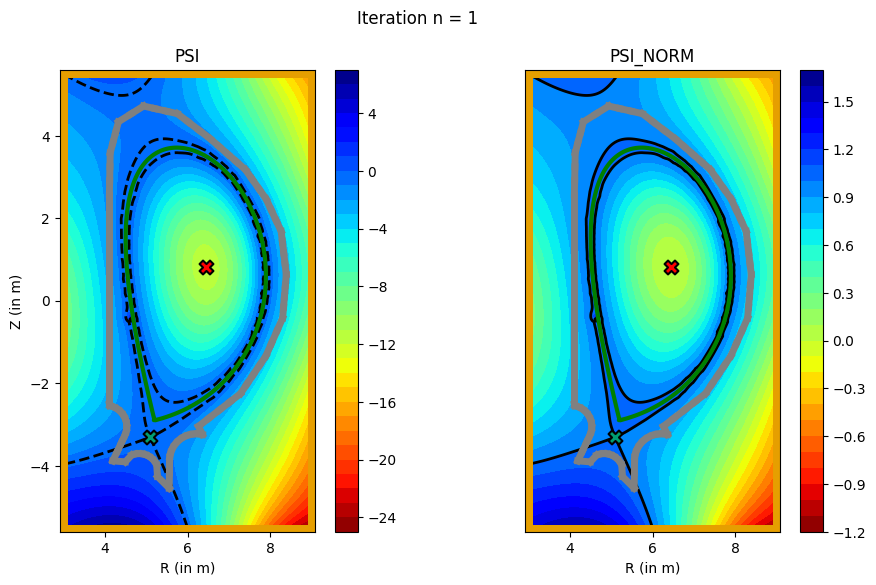

Internal iteration =  1 , PSI_NORM residu =  2.836503860840038
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.999999927
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.48077112 0.73599936]  (ELEMENT  6668 ) WITH VALUE PSI_0 =  -14.009413686459466
SADDLE POINT AT  [ 5.0631155  -3.39925646]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -0.03437851974597961


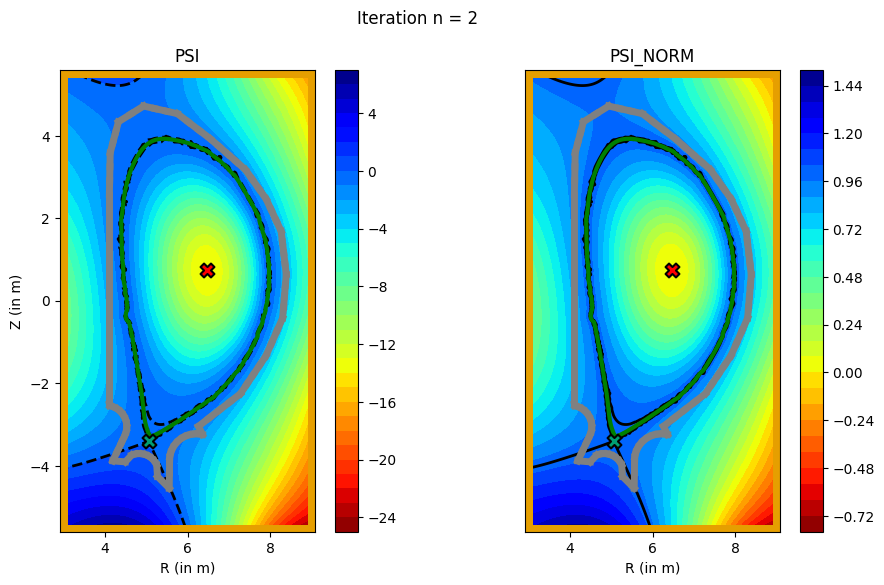

Internal iteration =  2 , PSI_NORM residu =  0.1186824497976661
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  14999999.999999484
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49606732 0.71104956]  (ELEMENT  6671 ) WITH VALUE PSI_0 =  -13.397770910727266
SADDLE POINT AT  [ 5.05708681 -3.41062568]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.5708534699093126e-05


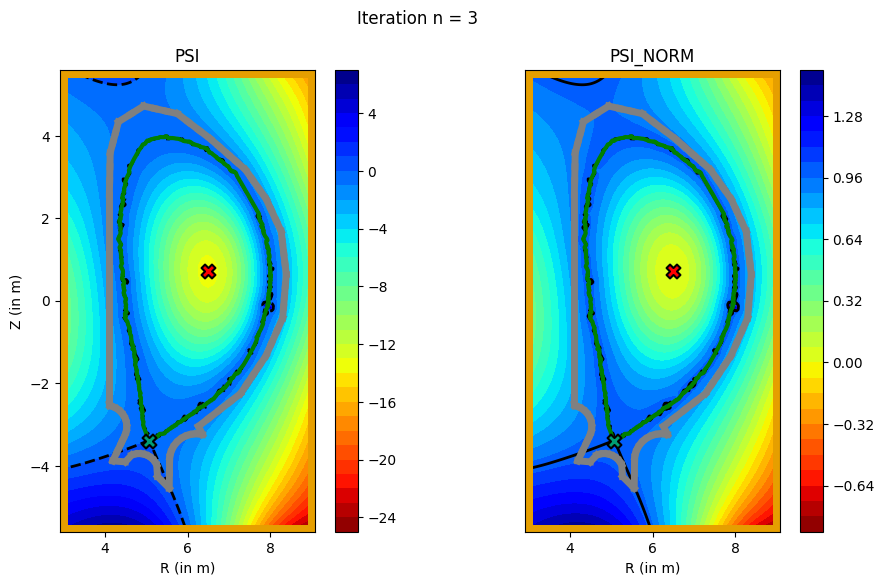

Internal iteration =  3 , PSI_NORM residu =  0.0272338560667851
 
Plasma region unchanged: distance between consecutive saddle points =  0.012868730054538554
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  15000000.000000164
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50129539 0.70090041]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -13.02556955982481
SADDLE POINT AT  [ 5.05710133 -3.41061295]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.5821229581482523e-05


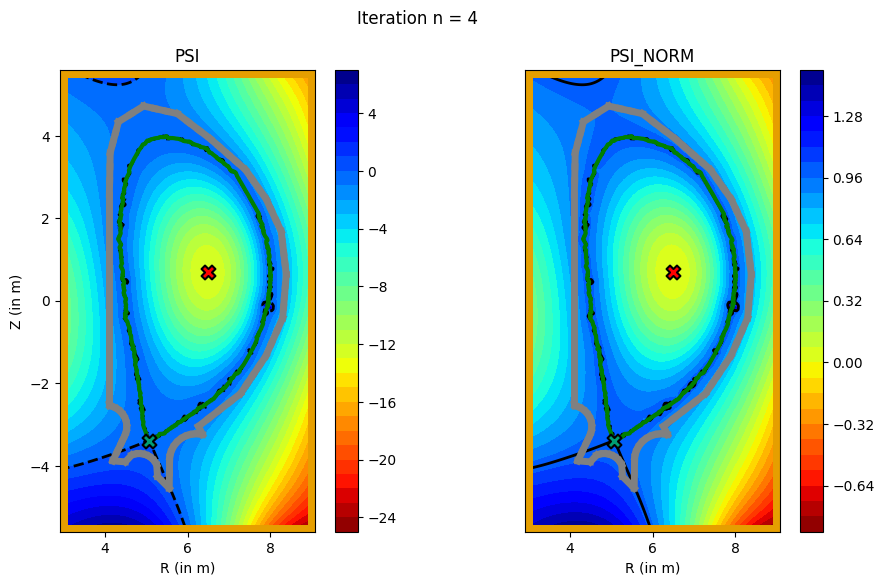

Internal iteration =  4 , PSI_NORM residu =  0.016243279443019856
 
Plasma region unchanged: distance between consecutive saddle points =  0.012850687163849362
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000278
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50265083 0.6958628 ]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.960425741890468
SADDLE POINT AT  [ 5.05710508 -3.41061006]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.584733052175449e-05


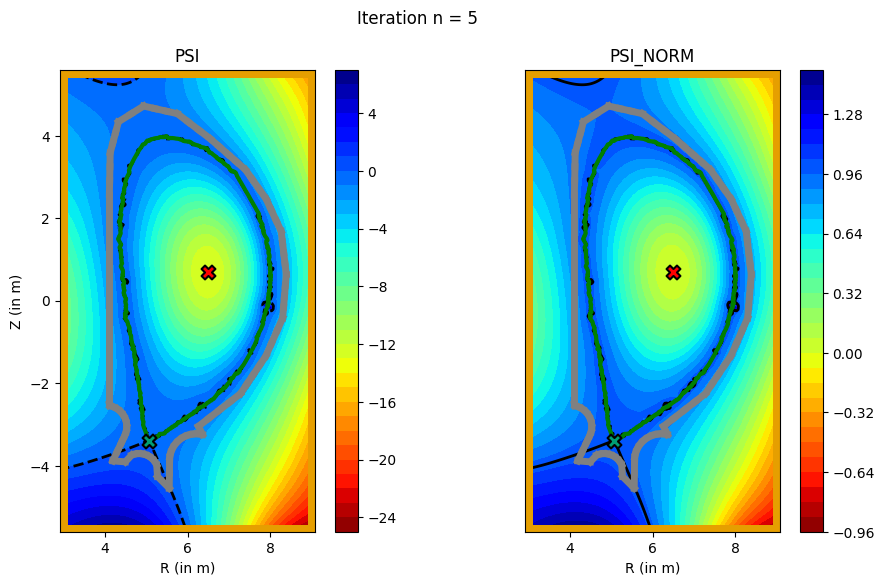

Internal iteration =  5 , PSI_NORM residu =  0.003084532414986957
 
Plasma region unchanged: distance between consecutive saddle points =  0.01284637141474487
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  15000000.000000162
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50296181 0.69325254]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.943478817935139
SADDLE POINT AT  [ 5.05710637 -3.41060907]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.585597898742396e-05


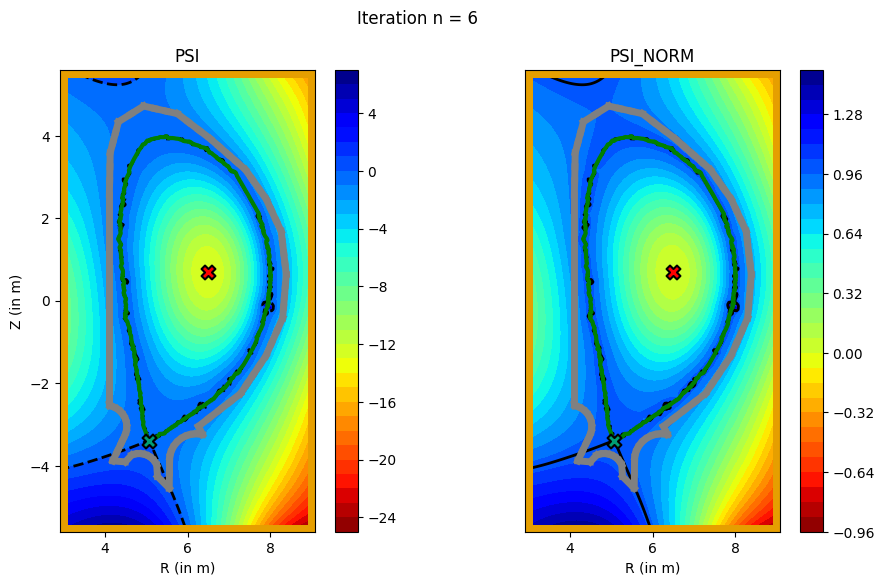

Internal iteration =  6 , PSI_NORM residu =  0.0008762298517001251
 
Plasma region unchanged: distance between consecutive saddle points =  0.012844902415746704
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  14999999.999999749
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50302978 0.69191306]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.93834157506339
SADDLE POINT AT  [ 5.05710688 -3.41060869]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.5859362535101814e-05


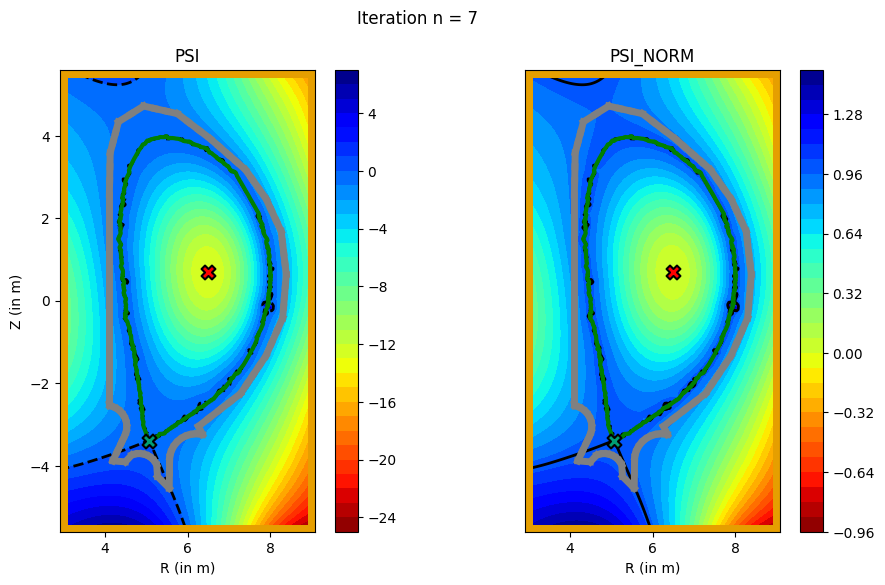

Internal iteration =  7 , PSI_NORM residu =  0.00030425485156306096
 
Plasma region unchanged: distance between consecutive saddle points =  0.01284431986267728
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000302
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50304544 0.69123557]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.936646734606414
SADDLE POINT AT  [ 5.0571071  -3.41060852]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.5860802363778418e-05


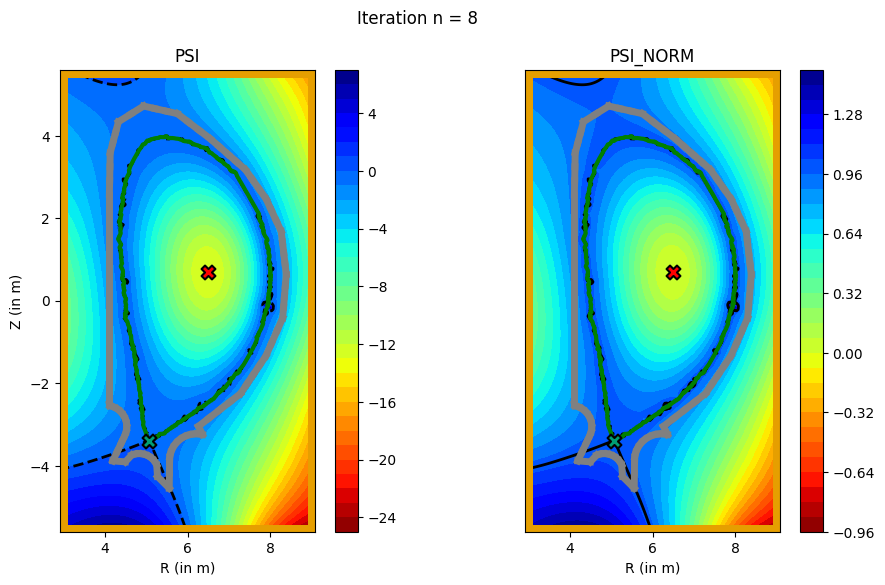

Internal iteration =  8 , PSI_NORM residu =  0.00012113908774302401
 
Plasma region unchanged: distance between consecutive saddle points =  0.01284407012257126
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  14999999.999999715
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50305011 0.69089642]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.936053886294502
SADDLE POINT AT  [ 5.0571072  -3.41060844]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -2.586144610434583e-05


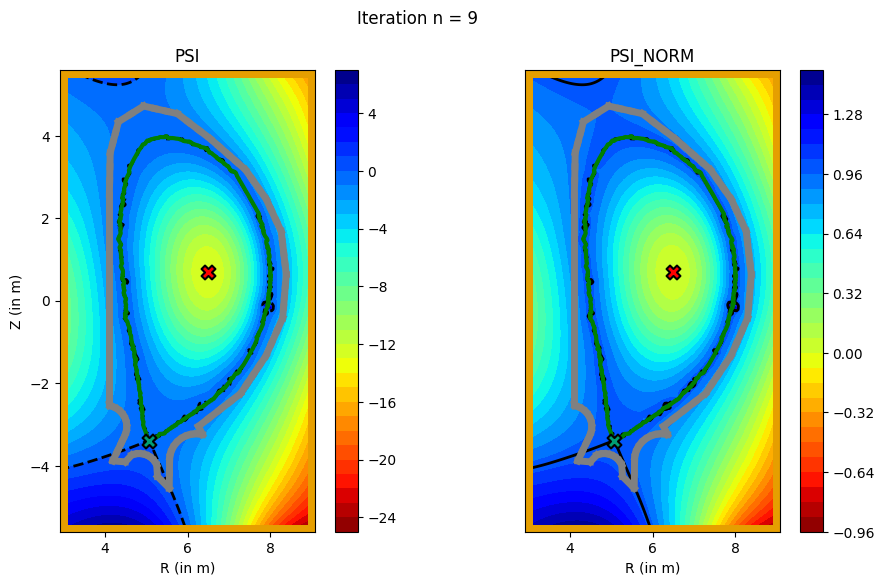

Internal iteration =  9 , PSI_NORM residu =  5.2852632998278924e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.012843957970866076
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.03322477089927717
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  14999999.999999931
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50314202 0.69054969]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.937200195065113
SADDLE POINT AT  [ 5.07045803 -3.40661111]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -0.00011102435380096654


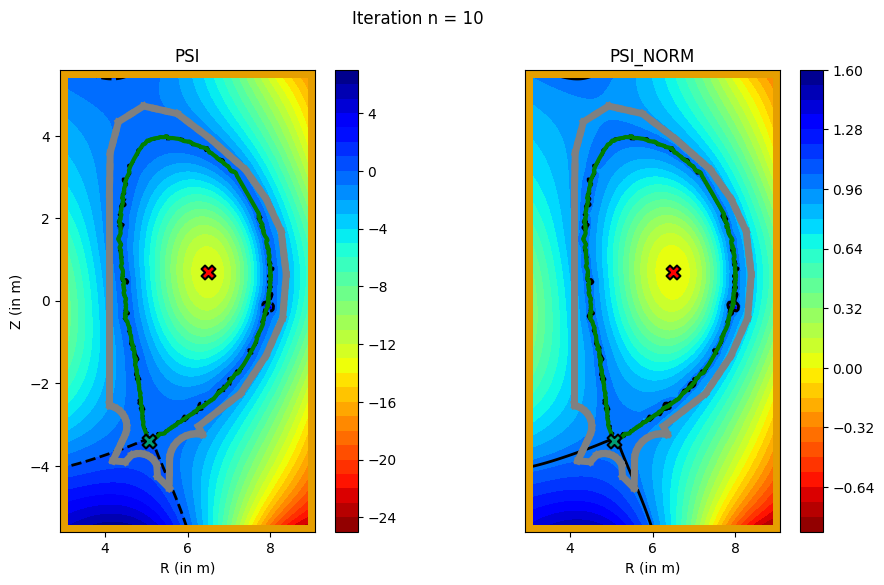

Internal iteration =  1 , PSI_NORM residu =  0.018858056188357845
 
Plasma region unchanged: distance between consecutive saddle points =  0.010392477488411302
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  15000000.00000013
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.50318563 0.69037088]  (ELEMENT  6674 ) WITH VALUE PSI_0 =  -12.936627509054953
SADDLE POINT AT  [ 5.07045789 -3.40661125]  (ELEMENT  3002 ) WITH VALUE PSI_X =  -0.00011102871498493513


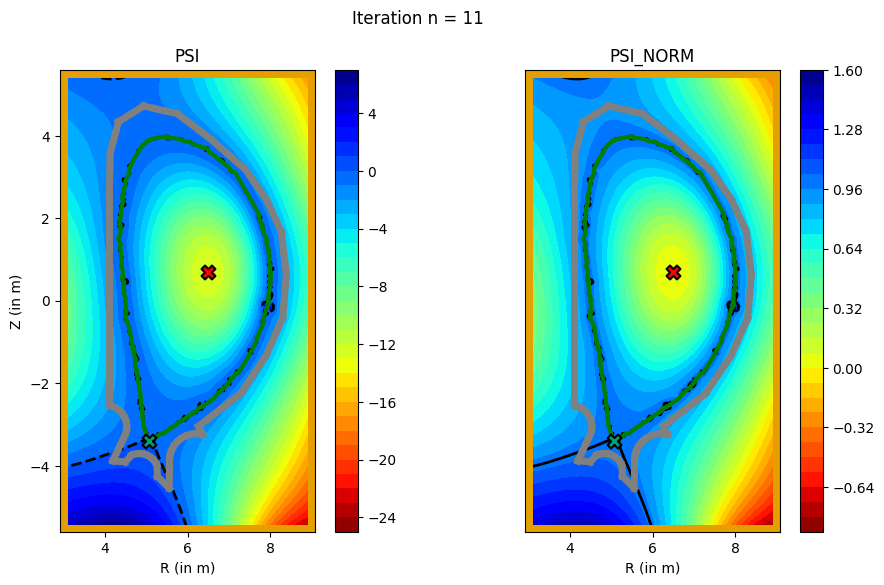

Internal iteration =  2 , PSI_NORM residu =  3.2520459048478944e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.010392477542991828
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  7.510341800773586e-05
 
SOLUTION CONVERGED


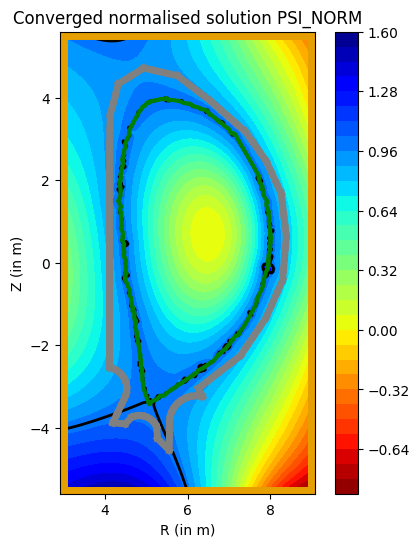

In [22]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-SHAPEDCOILS-3"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)

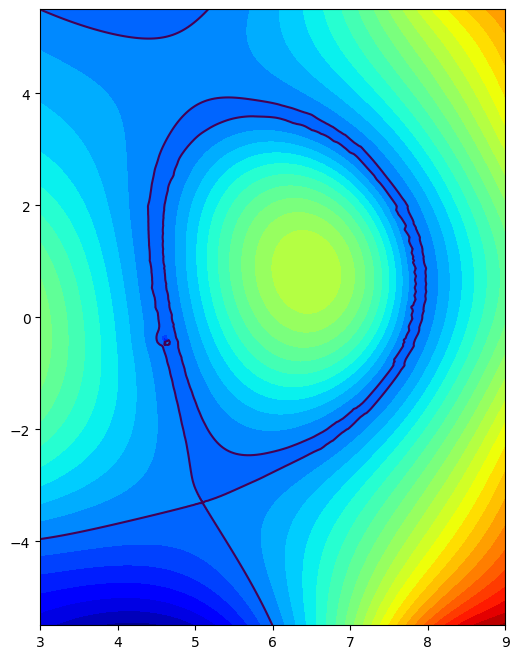

In [23]:
self = Equilibrium

PSI_NORM = self.PSI_NORM_sim[1]

# OBTAIN POINTS CONFORMING THE NEW PLASMA DOMAIN BOUNDARY
fig, ax = plt.subplots(figsize=(6, 8))
ax.tricontourf(self.MESH.X[:,0],self.MESH.X[:,1], PSI_NORM, cmap=eqplot.plasmacmap,levels=30)
cs = ax.tricontour(self.MESH.X[:,0],self.MESH.X[:,1], PSI_NORM, levels=[self.PSI_NORMseparatrix])

paths = list()

# CHECK IF CONTOUR SETS CONTAINS SADDLE POINT OR COMPUTATIONAL BOUNDARY POINTS (CLOSE ENOUGH) 
for item in cs.collections:
    for path in item.get_paths():
        path_dict = dict()
        path_dict['coords'] = path.vertices
        path_dict['saddlepoint'] = False
        path_dict['compbound'] = False
        for point in path.vertices:
            # COMPUTE DISTANCE TO SADDLE POINT
            dist_saddle = np.linalg.norm(point-self.Xcrit[1,1,0:2])
            # COMPUTE DISTANCE TO COMPUTATIONAL BOUNDARY NODES
            dist_bound = np.sqrt((self.MESH.X[self.MESH.BoundaryNodes,0]-point[0])**2+(self.MESH.X[self.MESH.BoundaryNodes,1]-point[1])**2)
            # CHECK IF CONTOUR CONTAINS SADDLE POINT
            if  dist_saddle < 0.2:
                path_dict['saddlepoint'] = True
                # CHECK IF CONTOUR CONTAINS COMPUTATIONAL DOMAIN BOUNDARY POINTS
            elif np.any(dist_bound <= 0.1):
                path_dict['compbound'] = True
        paths.append(path_dict)

# DIFFERENT PROCEDURES:
# 1. DISCARD SETS WHICH DO NOT CONTAIN THE SADDLE POINT
paths_temp = list()
for path in paths:
    if path['saddlepoint']:
        paths_temp.append(path)
paths = paths_temp.copy()        

# IF THERE ARE MORE THAN 1 CONTOUR SET CONTAINING THE SADDLE POINT, REMOVE THE SETS CONTAINING COMPUTATIONAL BOUNDARY POINTS
if len(paths) > 1:
    paths_temp = list()
    for path in paths:
        if not path['compbound']:
            paths_temp.append(path)
    paths = paths_temp.copy()
    # TAKE THE REMAINING SET AS THE NEW PLASMA BOUNDARY SET
    if len(paths) == 1:
        plasmaboundary = paths[0]['coords']
        
# IF A SINGLE CONTOUR REMAINS, CHECK WHETHER IT CONTAINS COMPUTATIONAL BOUNDARIES 
else:
    # IF THE REMAINING SET CONTAINS BOTH SADDLE POINT AND COMPUTATIONAL BOUNDARY POINTS
    if paths[0]['compbound']:       
        plasmaboundary = list()
        oncontour = False
        firstpass = True
        secondpass = False
        counter = 0
        for point in paths[0]['coords']:
            if np.linalg.norm(point-self.Xcrit[1,1,0:2]) < 0.3 and firstpass:
                oncontour = True 
                firstpass = False
                plasmaboundary.append(point)
            elif oncontour:
                plasmaboundary.append(point)
                counter += 1
            if counter > 50:
                secondpass = True
            if np.linalg.norm(point-self.Xcrit[1,1,0:2]) < 0.3 and secondpass: 
                oncontour = False 
                        
        plasmaboundary.append(plasmaboundary[0])
        plasmaboundary = np.array(plasmaboundary)
    # IF THE REMAINING SET DOES NOT CONTAIN ANY COMPUTATIONAL BOUNDARY POINT, TAKE IT AS THE NEW PLASMA BOUNDARY SET 
    else: 
        plasmaboundary = paths[0]['coords']

#fig.clear()
#plt.close(fig)


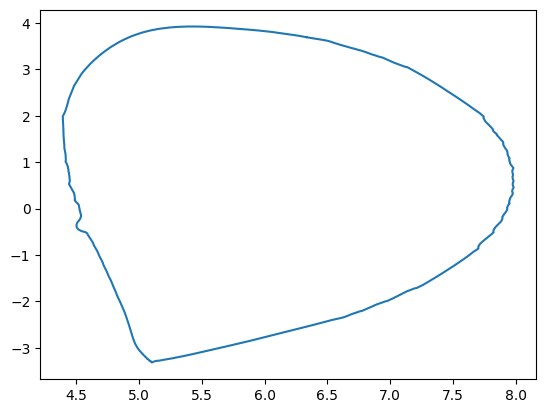

In [24]:
plt.plot(plasmaboundary[:,0],plasmaboundary[:,1])

In [25]:
# IF PLASMA BOUNDARY CURVE ABOVE maxnumpoints POINTS, BRING IT DOWN 
maxnumpoints = 500
for path in paths:
    if len(plasmaboundary[:,0]) > maxnumpoints:
        indices = np.linspace(0, len(plasmaboundary[:,0]) - 1, maxnumpoints, dtype=int)
        plasmaboundary = plasmaboundary[indices,:]


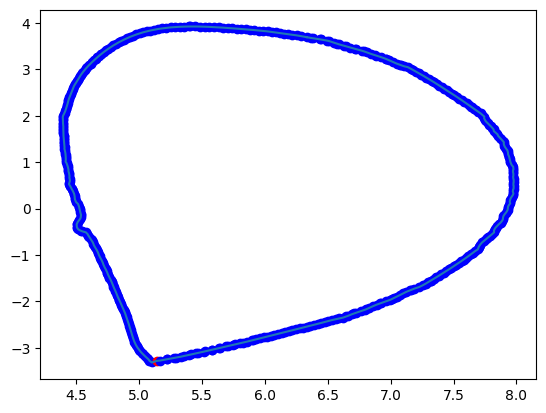

In [26]:
plt.plot(plasmaboundary[:,0],plasmaboundary[:,1])

# CHECK RESULTING CURVE FOR ABRUPT DIRECTIONAL CHANGES
smooth = True
smoothplasmaboun = list()
# INITIALISE
smoothplasmaboun.append(plasmaboundary[0,:])
smoothplasmaboun.append(plasmaboundary[1,:])
vect0 = plasmaboundary[1,:] - plasmaboundary[0,:]
vect0 /= np.linalg.norm(vect0)
for inode in range(2,len(plasmaboundary[:,0])):
    # COMPUTE TANGENT VECTOR AT POINT
    vect1 = plasmaboundary[inode,:] - plasmaboundary[inode-1,:]
    vect1 /= np.linalg.norm(vect1) 
    # CHECK FOR BRUPT CHANGE
    if np.dot(vect0,vect1) < 0:
        smooth = False
    else:
        smooth = True
        
    if smooth:
        smoothplasmaboun.append(plasmaboundary[inode,:])
        # UPDATE TANGENT VECTOR FROM PREVIOUS POINT
        vect0 = vect1
        plt.scatter(plasmaboundary[inode,0],plasmaboundary[inode,1],color='blue')
    else:
        plt.scatter(plasmaboundary[inode,0],plasmaboundary[inode,1],color='red')
           
smoothplasmaboun = np.array(smoothplasmaboun)

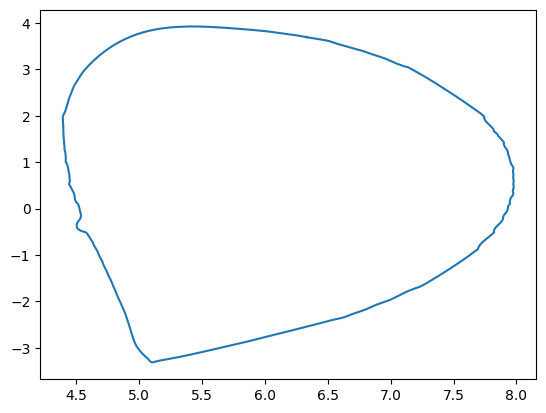

In [27]:
plt.plot(smoothplasmaboun[:,0],smoothplasmaboun[:,1])

In [28]:
print(len(plasmaboundary),len(smoothplasmaboun))

500 499


In [29]:

# Create a Path object for the new plasma domain
polygon_path = Path(plasmaboundary)
# Check if the mesh points are inside the new plasma domain
inside = polygon_path.contains_points(self.MESH.X)

# FORCE PLASMA LEVEL-SET SIGN DEPENDING ON REGION
PSILevSet = self.PSI_NORMseparatrix - PSI_NORM.copy()
for inode in range(self.MESH.Nn):
    if inside[inode]:
        PSILevSet[inode] = -np.abs(PSILevSet[inode])
    else:
        PSILevSet[inode] = np.abs(PSILevSet[inode])